# Regression Diagnostics

In [1]:
# Load relevant libraries.

%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime as dt  
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import patsy
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
import warnings
warnings.simplefilter('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
# One more time.

start, end = dt.datetime(2006, 1, 1), dt.datetime(2016, 12, 31)
aapl_all = web.DataReader('aapl', 'yahoo', start, end)
nasdaq_all = web.DataReader('^ixic', 'yahoo', start, end)
aapl = aapl_all['Adj Close']
nasdaq = nasdaq_all['Adj Close']

aapl_returns = np.log(aapl / aapl.shift(1))
nasdaq_returns = np.log(nasdaq / nasdaq.shift(1))
aapl_returns = aapl_returns.dropna()
nasdaq_returns = nasdaq_returns.dropna()

aapl_r = pd.DataFrame(aapl_returns)
nasdaq_r = pd.DataFrame(nasdaq_returns)
data = pd.merge(nasdaq_r, aapl_r, left_index=True, right_index=True)
data.head()
data.rename(columns={'Adj Close_x':'nasdaq', 'Adj Close_y':'aapl'}, inplace=True)
mod = smf.ols(formula='aapl ~ nasdaq', data = data).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                   aapl   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     2114.
Date:                Sun, 16 Apr 2017   Prob (F-statistic):               0.00
Time:                        19:13:39   Log-Likelihood:                 7541.1
No. Observations:                2768   AIC:                        -1.508e+04
Df Residuals:                    2766   BIC:                        -1.507e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0006      0.000      1.898      0.0

## R$^2$

We already know that different packages produce different regression output, which are typically called "regression diagnosgics."  Python's statsmodels basically mirrors the regression diagnostics produced by Stata.  We have already reviewed coefficients, standard errors, t values, and confidence intervals. 

As I noted, the R$^2$ "goodness of fit" metric is a frequently-cited regression diagnostic.  If a linear regression uses a constant (which should be included in practice), the R$^2$ is bounded between 0 and 1.  It measures the share of the variation in $y$ explained by the variation in the features used in a model.  Given this definition, "bigger is better" is the first place that people go to evaluate the quality of the model, which is unwarranted.  

"However, it can still be challenging to determine what is a good R$^2$ value, and in general, this will depend on the application.  For instance, in certain problems in physics, we may know that the data truly comes from a linear model with a small residual error.  In this case, we would expect to see an R$^2$ value that is extremely close to 1, and a substantially smaller R$^2$ might indicate serious problems with the experiment in which the data were generated.  On the other hand, in typical application in biology, pyschology, marketing and other domains, the linear model is at best an extremely rough approximation to the data, and residual errors due to other unmeasured factors are often very large.  In this setting, we would expect only a very small proportion of the variacne in the response to be explained by the predictor, and an R$^2$ value well below 0.1 might be more realistic."  Trevor Hastie, Robert Tibshirani, et al.

The example I showed last time was meant to highlight this very point.  

## Other Diagnostics to Assess Model Quality

Adjusted R$^2$: A metric that captures the penalty in the use of a large number of features with little explanatory power.  

AIC (the Akaike Information Criterion): a measure of the relative quality of a statistical model for a given set of data.  It captures the trade-off between the goodness of fit and the complexity of the model.  For example, if I have $N$ $(y,x)$ pairs, I could in principle fit an $N-1$ degree polynomial that passed through all points.  

BIC (the Bayes Information Criterion): another measure of relative quality.  Rule of thumb: chose the model with the lowest BIC.

# Multivariate Regression Analysis

It is trivial to extend the single-feature linear model to a linear model that simultaneously incorporates multiple features.  The interpretation of the results of a statistical model that uses multiple features is the same the interpretation of the partial derivative from the calculus of many variables: the effect of a small change in a particular feature on a label (or outcome).  

A model with $K$ features, $x_{ik}$ and label $y_i$:

$y_i=\sum_{k=1}^Kx_{ik}\cdot\beta_k+\epsilon_i = x_i^\prime \beta + \epsilon_i$

The $K$ features $x_{ik}$ influence the label $y_i$ through the $K$-vector, $\beta$, which we estimate statistically.  A specific partial derivative interpretation.

${\displaystyle \frac{\partial E(y_i)}{\partial x_{ik}}=\beta_k}$

(For those interested in ancient history: Frisch–Waugh–Lovell theorem.)

Bottom line is simple: Fit the linear model with multiple features.  The basic approach to hypothesis testing remains unchanged. The challenge is the interpretation of the results, which we will discuss in detail.  

## Application: Human Capital Theory and the Returns to Education

### Overview: The Early Days

> “Those talents, as they make a part of his fortune, so do they likewise that of the society to which he belongs. The improved dexterity of a workman may be considered in the same light as a machine or instrument of trade which facilitates and abridges labor, and which, though it costs a certain expense, repays that expense with a profit.”  
Adam Smith, The Wealth of Nations

### Human Capital Theory

+ Human capital (as opposed to physical or financial capital) comprises the abilities, knowledge, education, and other attributes that individuals bring to the labor market.
+ In exchange for their labor to produce economic value in the marketplace, individuals receive wages (or earnings).
+ Strong focus on the development of capital through education and workforce experience. 


### Education: Skill or Signal?

+ One idea is that education increases an individual’s skill, allowing her to capture a higher rents in the labor market.  In other words, higher education increases earings.
+ A separate idea is that education is simply a signal to potential employers about one’s unobservable skill and potential dedication.
    - Places of higher education also allow people to tap into networks to aid in employment (such as MBAs).
    

### Mincerian Wage Functions

+ Economist Jacob Mincer specified an approach that relates observed wages to schooling and other measures of human capital, such as job market experience. 
+ Relation is typically expressed as the natural log of wages.  Wages are not normally distributed (no negative wages), but rather could be log-normally distributed.
    - $ln(1+r) ≈ r$ for small $r$, so least squares estimates can be viewed as rates of return.
    
    
### The Returns to Education

+ Goal is measure the “rate of return” to education.
+ Increase, if any, in wages associated with an additional year of education.
+ A simple correlation of wages and years of schooling does not necessarily accurately measure this relation.
    - Could do randomized trials, but substantial objections to “human trials.”
+ Let’s look at the Griliches (1976) data.



In [3]:
# Grab the Griliches (1979) data.
# https://athens.src.uchicago.edu/jenni/dvmaster/FILES/griliches77f.pdf

griliches = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Griliches.csv")
griliches = griliches.drop(griliches.columns[0], 1)
print(griliches.describe())

             med          iq         kww        year         age       age80  \
count  758.00000  758.000000  758.000000  758.000000  758.000000  758.000000   
mean    10.91029  103.856201   36.573879   69.031662   21.835092   33.011873   
std      2.74112   13.618666    7.302247    2.631794    2.981756    3.085504   
min      0.00000   54.000000   12.000000   66.000000   16.000000   28.000000   
25%      9.00000   95.250000   32.000000   66.000000   20.000000   30.000000   
50%     12.00000  104.000000   37.000000   69.000000   22.000000   33.000000   
75%     12.00000  113.750000   41.000000   71.000000   24.000000   36.000000   
max     18.00000  145.000000   56.000000   73.000000   30.000000   38.000000   

           school    school80        expr      expr80      tenure    tenure80  \
count  758.000000  758.000000  758.000000  758.000000  758.000000  758.000000   
mean    13.405013   13.707124    1.735429   11.394261    1.831135    7.362797   
std      2.231828    2.214693    2.1

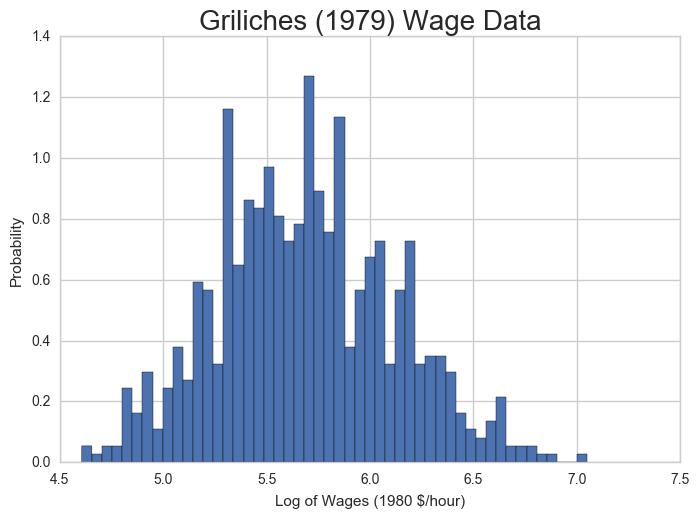

In [4]:
plt.hist(griliches['lw'], 50, normed=1)
plt.xlabel('Log of Wages (1980 $/hour)')
plt.ylabel('Probability')
plt.title('Griliches (1979) Wage Data', fontsize = 20)

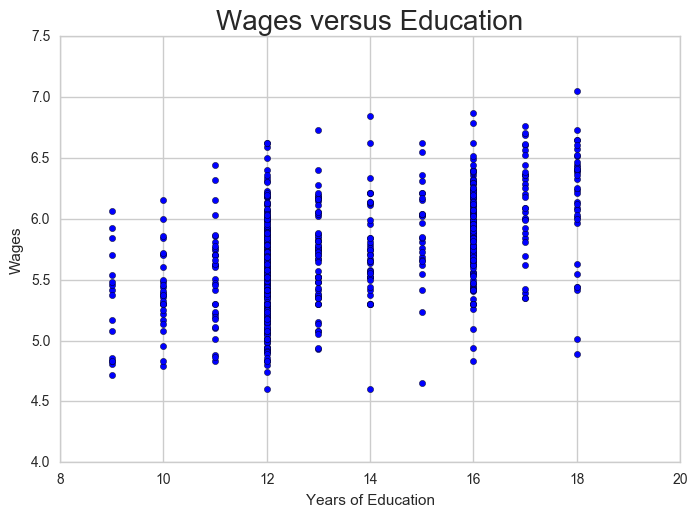

In [5]:
# A crude analysis of wages and education.

plt.scatter(griliches['school'], griliches['lw'])
plt.xlabel('Years of Education')
plt.ylabel('Wages')
plt.title('Wages versus Education', fontsize = 20)

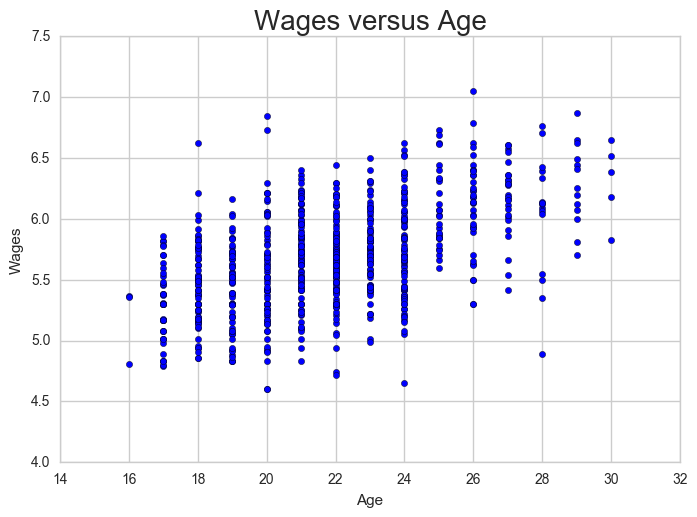

In [6]:
plt.scatter(griliches['age'], griliches['lw'])
plt.xlabel('Age')
plt.ylabel('Wages')
plt.title('Wages versus Age', fontsize=20)

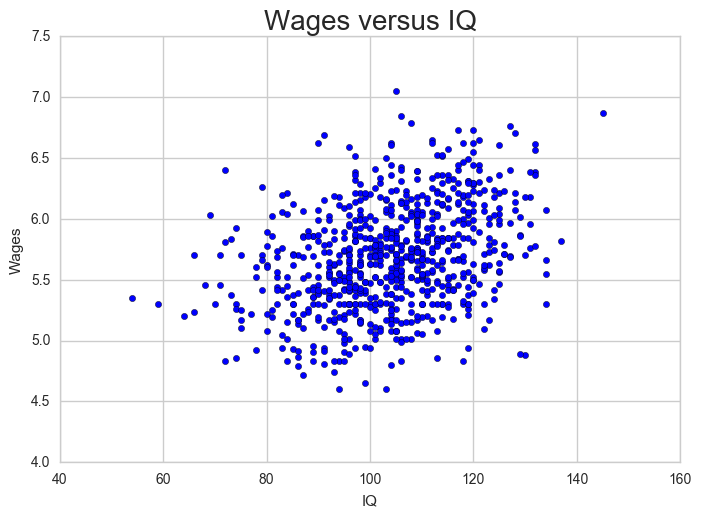

In [7]:
plt.scatter(griliches['iq'], griliches['lw'])
plt.xlabel('IQ')
plt.ylabel('Wages')
plt.title('Wages versus IQ', fontsize=20)

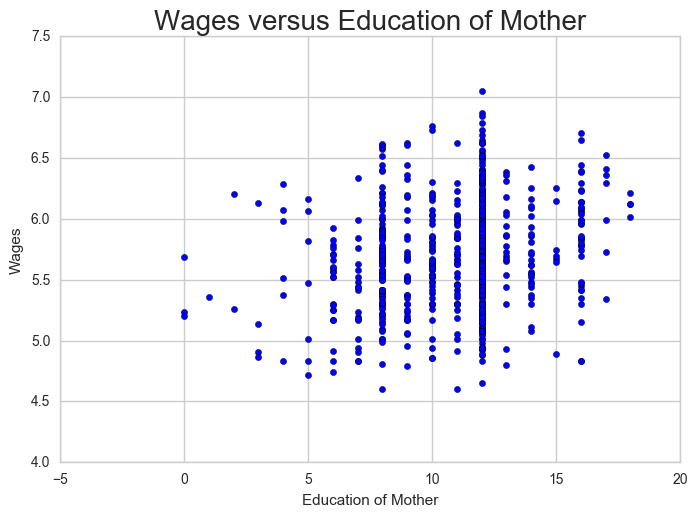

In [8]:
plt.scatter(griliches['med'], griliches['lw'])
plt.xlabel('Education of Mother')
plt.ylabel('Wages')
plt.title('Wages versus Education of Mother', fontsize=20)

In [9]:
mod = smf.ols(formula = 'lw ~ school', data = griliches).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                     lw   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     255.7
Date:                Sun, 16 Apr 2017   Prob (F-statistic):           8.52e-50
Time:                        19:13:41   Log-Likelihood:                -323.05
No. Observations:                 758   AIC:                             650.1
Df Residuals:                     756   BIC:                             659.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      4.3915      0.082     53.481      0.0

In [10]:
# Linear regression lets us take account of all attributes at once.
# And it allows us to measure something that is policy-relevant. 

mod = smf.ols(formula = 'lw ~ school + iq + age + expr + tenure + med', data = griliches).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                     lw   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     81.33
Date:                Sun, 16 Apr 2017   Prob (F-statistic):           2.51e-78
Time:                        19:13:41   Log-Likelihood:                -243.72
No. Observations:                 758   AIC:                             501.4
Df Residuals:                     751   BIC:                             533.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.3016      0.122     26.962      0.0

### What's a Lousy 5%?

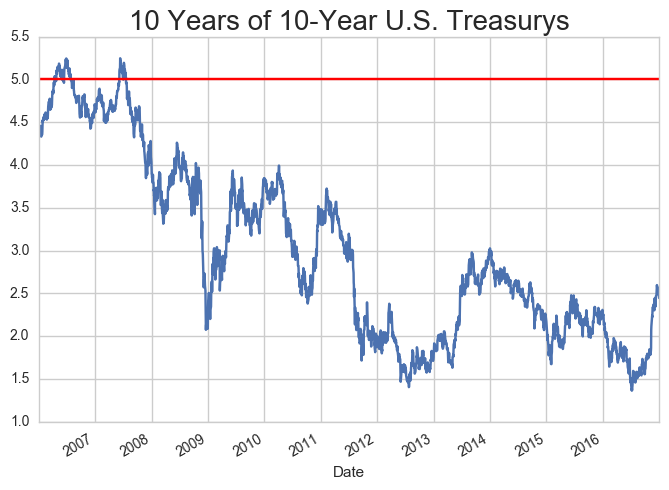

In [11]:
# Suppose one wanted to model 10-year US Treasurys.  (Yes, the spelling is correct.)  Start with observed rates.

start, end = dt.datetime(2006, 1, 1), dt.datetime(2016, 12, 31)
rates = web.DataReader('^TNX', 'yahoo', start, end)
rates['Adj Close'] = rates['Adj Close'] 
rates['Adj Close'].plot()
plt.title('10 Years of 10-Year U.S. Treasurys', fontsize=20)
plt.axhline(5, color = 'red')

# The Linear Probability Model and The Logistic Classifier (or "Logit")

The problem above examined a continuous label or dependent variable.  That is, $y$ was quantitative: the sales prices of single-family houses in Staten Island.  Often, we wish to examine a discrete or categorical label.  What is a categorical label?  An example would be eye color: $\{$brown, green, blue$\}$.  

In economics, this is considered to be analysis of "limited dependent variables," while in computer science, it is classification.  This different terminology refers to the same thing.  We will begin with the linear probability model (with multiple attributes), which allows us to seemless transition to the Logistic Classifier (or "Logit").

This simple classifier is the ground upon which data scientists of all stripes converge.  It is a very important methodological technique that I want you to understand thoroughly.

## Latent Values

One can think of categorical variable as being driven by an underlying DGP, and we as observers, observe only outcomes.

Consider: $y_i^*=x_i^\prime\beta+\epsilon_i$

$y_i^*$ is a latent value for person i that is unobserved by us.  For example, you do not observe the value I place on this bottle of water.  You simple observe me drinking it.  In other words, you observe the outcome my choice set $\{$drink, not drink$\}$.  Another example would be observing someone taking a taxi.  You do not observe the value that someone places on the taxi ride.  You know that she has many alternative methods of transportation, all with varying values to her, but you observe the outcome of her choice.

$x_i$ are a vector of features (or attributes or predictors or independent variables).  We observe these.

$\beta$ is a vector that measures how features affect the latent index, which we will estimate statistically. 

$\epsilon_i$ retains its status as our ignorance.  

What do we observe?

${\displaystyle d_i = }$
$\left\{ \begin{array}{l l} 
{1} & \quad \text{if person i takes a cab, which happens when } y_i^*\ge0\\ 
{0} & \quad \text{if person i does not take a cab, which happens when } y_i^*\lt0 \\
\end{array} \right.$

The latent variable approach has become a very popular modeling tool in statistical learning.  

In [12]:
# Read in some data on graduate school admissions.  These data are fictional, but useful.

data = pd.read_csv("http://www.ats.ucla.edu/stat/data/binary.csv")
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit    400 non-null int64
gre      400 non-null int64
gpa      400 non-null float64
rank     400 non-null int64
dtypes: float64(1), int64(3)
memory usage: 12.6 KB
None
            admit         gre         gpa       rank
count  400.000000  400.000000  400.000000  400.00000
mean     0.317500  587.700000    3.389900    2.48500
std      0.466087  115.516536    0.380567    0.94446
min      0.000000  220.000000    2.260000    1.00000
25%      0.000000  520.000000    3.130000    2.00000
50%      0.000000  580.000000    3.395000    2.00000
75%      1.000000  660.000000    3.670000    3.00000
max      1.000000  800.000000    4.000000    4.00000


## Lab Session

Find the correlation matrix between the variables.
Run a few linear models.

In [13]:
print(data.corr())

          admit       gre       gpa      rank
admit  1.000000  0.184434  0.178212 -0.242513
gre    0.184434  1.000000  0.384266 -0.123447
gpa    0.178212  0.384266  1.000000 -0.057461
rank  -0.242513 -0.123447 -0.057461  1.000000


In [14]:
# School rank is a categorical feature, and we should capture this aspect using C(rank)
# C(rank) tells statsmodels to convert the categorical variable into indicator variables 
# and omit one of them
# The omitted categorical indicator is the reference category.
# Let's interpret the results from the linear probability model using the summary statistics 
# from the data.
# GRE: Graduate Record Examine: a one point increase in GRE increases probability of admission 
# by 0.0004 or 0.04%
# GPA: Grade Point Average: a one point increase in GPA increases probability of admission 
# by 0.156 or 15.6%.  
# rank: Going to a tier 2 school reduces probabilty of admission by 0.1624 or 16.24% 
# (relative to a tier 1 school).

mod = smf.ols(formula='admit ~ gre + gpa + C(rank)', data = data).fit()
print(mod.summary())
#print data.describe()

                            OLS Regression Results                            
Dep. Variable:                  admit   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     8.795
Date:                Sun, 16 Apr 2017   Prob (F-statistic):           6.33e-08
Time:                        19:13:42   Log-Likelihood:                -240.56
No. Observations:                 400   AIC:                             493.1
Df Residuals:                     394   BIC:                             517.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       -0.2589      0.216     -1.199   

In [15]:
# Let's make a prediction of admission for the "average" applicant at a tier 2 school.
# How might we generate a 95% confidence interval on this prediction?  You did it in Homework 2.  It's called bootstrapping.
# Remember the prediction for later.

print(data.describe())
print() 
print(mod.params)
print()
print(mod.params['Intercept'] + mod.params['C(rank)[T.2]'] + mod.params['gre'] *587.7 + mod.params['gpa'] * 3.3899)

            admit         gre         gpa       rank
count  400.000000  400.000000  400.000000  400.00000
mean     0.317500  587.700000    3.389900    2.48500
std      0.466087  115.516536    0.380567    0.94446
min      0.000000  220.000000    2.260000    1.00000
25%      0.000000  520.000000    3.130000    2.00000
50%      0.000000  580.000000    3.395000    2.00000
75%      1.000000  660.000000    3.670000    3.00000
max      1.000000  800.000000    4.000000    4.00000

Intercept      -0.258910
C(rank)[T.2]   -0.162365
C(rank)[T.3]   -0.290570
C(rank)[T.4]   -0.323026
gre             0.000430
gpa             0.155535
dtype: float64

0.358432056382


## The Logistic Classifier

Again, we start with a sample of size, $N$.  We are going to change the linear model to the following:

$Pr(d_i=1)=x_i^\prime\beta+\epsilon_i$

We will then impose a distributional assumption on $\epsilon_i$, namely that it is logistically distributed.

${\displaystyle Pr(d_i=1) = \frac{\exp(x_i^\prime\beta)}{1+\exp(x_i^\prime\beta)}}$ 

We see immediately that this is NOT a linear model (that is, a model that is linear in $\beta$).

${\displaystyle Pr(d_i=0) = 1 - Pr(d_i=1) = 1 - \frac{\exp(x_i^\prime\beta)}{1+\exp(x_i^\prime\beta)} = \frac{1}{1+\exp(x_i^\prime\beta)}}$

An "odds ratio":

${\displaystyle \frac{Pr(d_i=1)}{Pr(d_i=0)} = \frac{Pr(d_i=1)}{1 - Pr(d_i=1)} = \exp(x_i^\prime\beta)}$

This implies that the log-odds ratio (or "logit") is:

${\displaystyle \log\big(\frac{Pr(d_i=1)}{1 - Pr(d_i=1)}\big) = x_i^\prime\beta}$, which is linear in $\beta$.

To address the estimation of the parameters of interest, we need to construct a likelihood function that we will tell the computer to optimize.  Start by constructing the likelihood for observation $i$:

${\displaystyle l_i = Pr(d_i=1)^{d_i}\cdot Pr(d_i=0)^{(1-d_i)}=\frac{\exp(x_i^\prime\beta)}{1+\exp(x_i^\prime\beta)}^{d_1}\frac{1}{1+\exp(x_i^\prime\beta)}^{(1-d_i)}}$

If we make some assumptions we can write:

${\displaystyle L = \prod_{i=1}^N l_i = \prod_{i=1}^N \frac{\exp(x_i^\prime\beta)}{1+\exp(x_i^\prime\beta)}^{d_1}\frac{1}{1+\exp(x_i^\prime\beta)}^{(1-d_i)}}$

Goal is to tell the computer to maximize $L$ with respect to $\beta$ given the data we have. 

Once we have done that, we can make probabilistic predictions (or classifications).

In [16]:
# Let's fit the logit.

logit_mod = smf.logit('admit ~ gre + gpa + C(rank)', data = data).fit()
print()
print(logit_mod.summary())

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Sun, 16 Apr 2017   Pseudo R-squ.:                 0.08292
Time:                        19:13:42   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.578e-08
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       -3.9900      1.140     -3.500      0.000        -6.224    -1.756
C(rank)[T.2]    -0.675

What are these logit coefficients?
Big lesson: Unlike the linear probability model, shown below, they cannot be directly interpreted.
Note, however, the similarities.  

1. The signs are identical.
2. The relative magnitudes are similar.
3. The z and the t are (relatively) similar.

In [17]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  admit   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     8.795
Date:                Sun, 16 Apr 2017   Prob (F-statistic):           6.33e-08
Time:                        19:13:42   Log-Likelihood:                -240.56
No. Observations:                 400   AIC:                             493.1
Df Residuals:                     394   BIC:                             517.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       -0.2589      0.216     -1.199   

In [18]:
# Again we can make a prediction, the probability of admission or Pr(d=1), 
# using the logistic formula above.
# Average features at rank 2 school.

print(data.describe())
print() 
print(logit_mod.params)
print()
e = np.exp(logit_mod.params['Intercept'] + logit_mod.params['C(rank)[T.2]'] + 
           logit_mod.params['gre'] *587.7 + logit_mod.params['gpa'] * 3.3899)
print(e / (1 + e))

            admit         gre         gpa       rank
count  400.000000  400.000000  400.000000  400.00000
mean     0.317500  587.700000    3.389900    2.48500
std      0.466087  115.516536    0.380567    0.94446
min      0.000000  220.000000    2.260000    1.00000
25%      0.000000  520.000000    3.130000    2.00000
50%      0.000000  580.000000    3.395000    2.00000
75%      1.000000  660.000000    3.670000    3.00000
max      1.000000  800.000000    4.000000    4.00000

Intercept      -3.989979
C(rank)[T.2]   -0.675443
C(rank)[T.3]   -1.340204
C(rank)[T.4]   -1.551464
gre             0.002264
gpa             0.804038
dtype: float64

0.352284589104


In [19]:
# We can also generate marginal effects, 
# which are the change in probability of admission given a "small" change in the features. 
# Note their similarilities to the regression estimates from the linear probability model.

marginal = logit_mod.get_margeff()
print(marginal.summary())
print
print(mod.params)

        Logit Marginal Effects       
Dep. Variable:                  admit
Method:                          dydx
At:                           overall
                  dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
C(rank)[T.2]    -0.1314      0.060     -2.184      0.029        -0.249    -0.013
C(rank)[T.3]    -0.2608      0.062     -4.176      0.000        -0.383    -0.138
C(rank)[T.4]    -0.3019      0.076     -3.956      0.000        -0.451    -0.152
gre              0.0004      0.000      2.107      0.035      3.07e-05     0.001
gpa              0.1564      0.063      2.485      0.013         0.033     0.280
Intercept      -0.258910
C(rank)[T.2]   -0.162365
C(rank)[T.3]   -0.290570
C(rank)[T.4]   -0.323026
gre             0.000430
gpa             0.155535
dtype: float64
